## Homework 2 Part 2 Task 1: PCA
We will use the Fashion-MNIST dataset to build a PCA model. <br>
https://github.com/zalandoresearch/fashion-mnist <br>
Then, we will use the PCA model to <br>
(1) visualize the data in 2D <br>
(2) generate new images as a generative model <br>
This is a guided-task: <br>
You will see the output of a code cell and then figure out the code in that cell. <br>
In each code cell, there are instructions to help you. <br>
This is a very efficient and effective way to learn how to program with sk-learn

#### First, we load the dataset

In [6]:
# load the data, and it may take a while
from sklearn.datasets import fetch_openml
fasion_mnist=fetch_openml(name="Fashion-MNIST")

In [7]:
data=fasion_mnist.data.values
images=data.reshape(-1,28,28)
target=fasion_mnist.target.astype('int64')


In [8]:
#a row in data is an image (28x28 reshaped into a vector of 784 elements)
data.shape

(70000, 784)

In [9]:
# images[0] is the first image (28x28)
images.shape

(70000, 28, 28)

In [10]:
#an element in target is the class label of the corresponding image in data
target.shape

(70000,)

In [11]:
[target.min(), target.max()]

[0, 9]

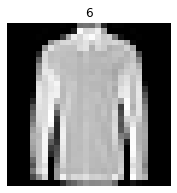

<Figure size 432x288 with 0 Axes>

In [12]:
# show some of the images
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, target.shape[0], 1000):
    x=data[n,:]
    x=x.reshape(28,28) # reshape a vector to an image
    ax.imshow(x, cmap='gray')    
    ax.axis('off')
    ax.set_title(target[n])
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.1)  

#### we need the function plot_components for visualization

In [13]:
from matplotlib import offsetbox
import numpy as np
def plot_components(data, model, images, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

### Your work begins here

In [14]:
#use IncrementalPCA (instead of original PCA) in sk-learn
#it runs faster to get the eigenvectors and eigenvalues
#it is more memory efficient
#the function 'fit' computes eigenvectors and eigenvalues
#use 'fit_transform' to do fit and forward transform together
from sklearn.decomposition import IncrementalPCA
import numpy as np

pca = IncrementalPCA(n_components = 2, whiten = False)
X = fasion_mnist.data
Beta = pca.fit_transform(X)
Y = Beta / np.sqrt(pca.explained_variance_)
print(X.shape)
print(Y.shape)
Y

(70000, 784)
(70000, 2)


array([[-0.11123809,  1.83957132],
       [ 1.24000976, -0.50935309],
       [-0.63920019, -1.24468904],
       ...,
       [-0.44985185, -0.82039195],
       [-0.19461301, -1.59327043],
       [-1.34027135,  0.10458687]])

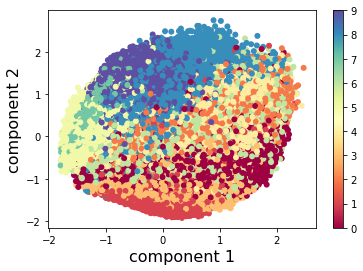

In [15]:
#show the data points in 2D
#you can find example code in my lecture notes (notebook files)
#you need to create a figure and axis:  fig, ax = plt.suplots()
plt.scatter(Y[:, 0], Y[:, 1], c=target, edgecolor='none',  cmap='Spectral')
plt.xlabel('component 1', fontsize=16)
plt.ylabel('component 2', fontsize=16)
plt.colorbar()

(7000, 2)


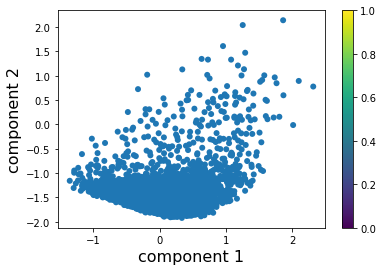

In [16]:
#show only the data points/images with class label=0 (i.e. target is 0) in 2D
temp = []
for idx in range(len(fasion_mnist.target)):
    if (fasion_mnist.target[idx]=="1"):
        temp.append([Y[idx, 0],Y[idx, 1]])
temp = np.array(temp)
print(temp.shape)
plt.scatter(temp[:, 0], temp[:, 1],  edgecolor='none',  cmap='Spectral')
plt.xlabel('component 1', fontsize=16)
plt.ylabel('component 2', fontsize=16)
plt.colorbar()


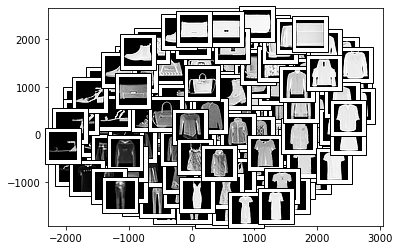

In [17]:
# use plot_components to show the data points
# the parameter 'model' of plot_components refers to the pca model
plot_components(data, pca, images, ax=None, thumb_frac=0.05, cmap='gray')

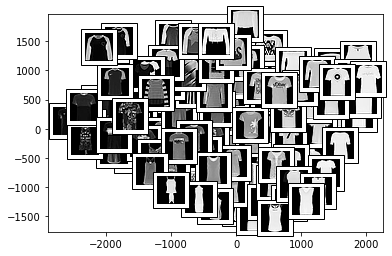

In [18]:
# use plot_components to show the data points with class label=0
# you may need something like this: data[target==0], images[target==0]
plot_components(data[target==0], pca, images[target==0], ax=None, thumb_frac=0.05, cmap='gray')


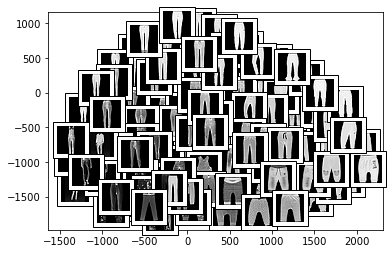

In [19]:
# use plot_components to show the data points with class label=1
# you may need something like this: data[target==1], images[target==1]
plot_components(data[target==1], pca, images[target==1], ax=None, thumb_frac=0.05, cmap='gray')


From the above examples, we can see that PCA can extract meaningful features from the images 

### 2. Use PCA to generate new images 

First, we need to figure out how many components we need

In [20]:
#use IncrementalPCA (instead of original PCA) in sk-learn
#set n_components to a large number, e.g, 100

pca = IncrementalPCA(batch_size = None, copy = True, n_components = 100, whiten = False)
X = fasion_mnist.data
Beta = pca.fit_transform(X)
Y = Beta / np.sqrt(pca.explained_variance_)
print(X.shape)
print(Y.shape)
Y

(70000, 784)
(70000, 100)


array([[-0.11146109,  1.84086283, -2.3412009 , ...,  0.14359486,
         0.26997058,  0.93725153],
       [ 1.24019859, -0.50935255, -0.5029413 , ...,  0.22405135,
        -0.62290469,  0.72345653],
       [-0.63917325, -1.24450607,  0.20717597, ...,  0.07931415,
         0.58341464, -0.04238479],
       ...,
       [-0.44989562, -0.81976214, -0.40187568, ...,  1.90398965,
        -1.10537986,  0.91496894],
       [-0.19471345, -1.59282979, -0.85725579, ...,  2.56463316,
        -1.40378894, -0.01770159],
       [-1.34026961,  0.10435673,  0.51442074, ..., -1.05024606,
        -0.157335  , -0.22144416]])

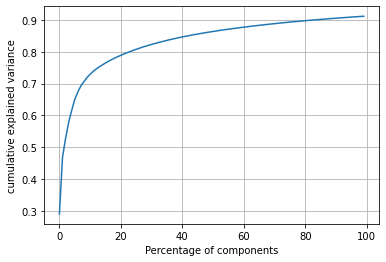

In [21]:
#plot the curve of 'percentage of variance explained' (0~1) vs n_components (0~100)
#apply np.cumsum on explained_variance_ratio_
# use plt.grid() to show grid
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Percentage of components')
plt.ylabel('cumulative explained variance')
plt.grid()


In [37]:
# find the value of n_component such that 
# (1) average reconstruction error is close to 20%
# (2) percentage of variance explained is close to 80%
# (1) and (2) are the same
# you do not need to re-fit the model using this new value of n_component
k = 0
sum = 0
for i in pca.explained_variance_ratio_:
    sum += i
    k += 1
    if sum > 0.8:
        break
k
        


24

In [23]:
# get the mean, eigenvalues, and eigenvectors from the pca model
# assume that:
# the name of mean is mu
# the name of eigenvalues is v (a 1D array)
# the name of eigenvectors is w (a 2D array)

mu = pca.mean_
w = pca.components_
v = pca.explained_variance_

In [24]:
v.shape

(100,)

In [25]:
w.shape

(100, 784)

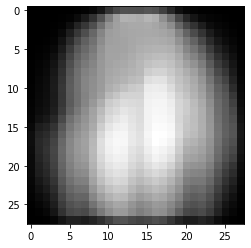

In [26]:
# plot the mean image from pca
# you need to reshape it to 28x28
plt.imshow(mu.reshape(28,28), cmap='gray')

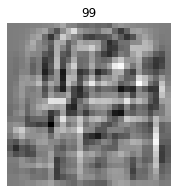

<Figure size 432x288 with 0 Axes>

In [27]:
# use a for loop to show the images of eigenvectors
# image is w[n].reshape(28,28)
# sample code:
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, 100):
     ax.imshow(w[n].reshape(28,28), cmap='gray')    
     ax.axis('off')
     ax.set_title(n)
     plt.draw()
     display.clear_output(wait=True)
     display.display(fig)
     plt.pause(0.01) 


In [28]:
# L2 norm of an eigenvector w[0]
np.sum(w[0]**2)

1.0000000000000007

In [29]:
# generate a random number
3*np.random.randn()

1.9254415811191121

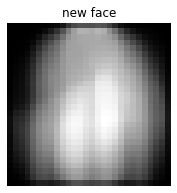

<Figure size 432x288 with 0 Axes>

In [30]:
# generate and show the new images
# use a for loop to geneate 100 new images
#     inside the for loop
#     x_new = mu + y[0]*sqrt(v[0])*w[0]+...+y[K]*sqrt(v[K])*w[K]
#     use a for loop to get X_new using the above equation
#     K is the number of components
#     y[k] is a random number generated using
fig, ax = plt.subplots(figsize=(3, 3))
x_new = mu
for n in range(0, 100):
    y =  3*np.random.randn()
    x_new += y*(v[n]**2)
    x_new = x_new.reshape(28,28)  
    ax.imshow(x_new, cmap='gray')    
    ax.axis('off')
    ax.set_title('new face')
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.1) 

PCA is not good at generating images. <br>
There is a better method based on neural networks.

### t-SNE for visualization

In [31]:
#select a subset of data points for TSNE
#because TSNE is very time-consuming
data_s=data[0::100]
target_s=target[0::100]
images_s=images[0::100]

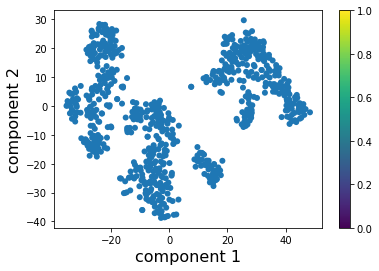

In [32]:
# run t-SNE on data_s and visualize the data in 2D
from sklearn.manifold import TSNE
tsne = TSNE()
tsne_results = tsne.fit_transform(data_s)

plt.scatter(tsne_results[:, 0], tsne_results[:, 1], edgecolor='none',  cmap='Spectral')
plt.xlabel('component 1', fontsize=16)
plt.ylabel('component 2', fontsize=16)
plt.colorbar()